In [2]:
import re

%matplotlib inline
import matplotlib
import seaborn as sns; sns.set()

datapath = "data/neko.txt.mecab"

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

### memo
フォーマット: `表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用形,活用型,原形,読み,発音`

In [3]:
# dict_keys
surface, base, pos, pos1 = "表層形", "基本形", "品詞", "品詞細分類"
prg = re.compile(r"(?P<sur>.+?)\t(?P<pos>[^,]+),(?P<pos1>[^,]+),([^,]+,){4}(?P<base>[^,]+).*")

# generator
def _neko_morph_():
    with open(datapath) as f:
        for line in f:
            res = prg.match(line)
            if res:
                yield {surface: res.group("sur"), base: res.group("base"), pos: res.group("pos"), pos1: res.group("pos1")}

## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [4]:
#for morph in neko_morph:
#    if morph[base] == "動詞":
#        print(morph[surface])

neko_morph = _neko_morph_()
verbs = [morph[surface] for morph in neko_morph if morph[pos] == "動詞"]
print(verbs)

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え', '煮', '食う', '思わ', '載せ', 'られ', '持ち上げ', 'られ', 'し', 'あっ', '落ちつい', '見', '見', '思っ', '残っ', 'いる', 'さ', 'れ', 'し', '逢っ', '出会わ', 'し', 'のみ', 'なら', 'し', 'いる', '吹く', 'せ', '弱っ', '飲む', '知っ', '坐っ', 'おっ', 'する', 'し', '始め', '動く', '動く', '分ら', '廻る', 'なる', '助から', '思っ', 'いる', 'さり', 'し', '出', 'し', 'いる', '考え出そ', '分ら', '付い', '見る', 'い', 'おっ', '見え', '隠し', 'しまっ', '違っ', '明い', 'い', 'られ', '這い出し', '見る', '棄て', 'られ', '這い出す', 'ある', '坐っ', 'し', '考え', '見', '出', 'し', '泣い', '来', 'くれる', '考え付い', 'やっ', '見', '来', '渡っ', 'かかる', '減っ', '来', '泣き', '出', 'ある', 'ある', 'し', 'そろ', '廻り', '始め', 'し', '這っ', '行く', '出', '這入っ', 'なる', '思っ', '崩れ', 'もぐり込ん', '破れ', 'い', 'し', '知れ', '云っ', '至る', 'する', 'なっ', 'いる', '忍び込ん', '分ら', 'なる', '減る', '降っ', '来る', '出来', 'なっ', 'あるい', '行く', '考える', '這入っ', 'おっ', '見る', 'し', '逢っ', '見る', 'つかん', '抛り出し', '思っ', 'ねぶっ', '任せ', 'い', '出来', '見', '這い', '上っ', '投げ出さ', 'れ', '投げ出さ', 'れ', '這い', '上り', '這い', '上っ', '投げ出さ', 'れ', '繰り返し', 'し', 'いる', '云う', 'なっ', 'し', 'やっ', '下り', 'つまみ出さ', 'れよ

## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [4]:
neko_morph = _neko_morph_()
original_verbs = [morph[base] for morph in neko_morph if morph[pos] == "動詞"]
print(original_verbs)

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える', '煮る', '食う', '思う', '載せる', 'られる', '持ち上げる', 'られる', 'する', 'ある', '落ちつく', '見る', '見る', '思う', '残る', 'いる', 'する', 'れる', 'する', '逢う', '出会う', 'する', 'のむ', 'なる', 'する', 'いる', '吹く', 'する', '弱る', '飲む', '知る', '坐る', 'おる', 'する', 'する', '始める', '動く', '動く', '分る', '廻る', 'なる', '助かる', '思う', 'いる', 'さる', 'する', '出る', 'する', 'いる', '考え出す', '分る', '付く', '見る', 'いる', 'おる', '見える', '隠す', 'しまう', '違う', '明く', 'いる', 'られる', '這い出す', '見る', '棄てる', 'られる', '這い出す', 'ある', '坐る', 'する', '考える', '見る', '出る', 'する', '泣く', '来る', 'くれる', '考え付く', 'やる', '見る', '来る', '渡る', 'かかる', '減る', '来る', '泣く', '出る', 'ある', 'ある', 'する', 'そる', '廻る', '始める', 'する', '這う', '行く', '出る', '這入る', 'なる', '思う', '崩れる', 'もぐり込む', '破れる', 'いる', 'する', '知れる', '云う', '至る', 'する', 'なる', 'いる', '忍び込む', '分る', 'なる', '減る', '降る', '来る', '出来る', 'なる', 'あるく', '行く', '考える', '這入る', 'おる', '見る', 'する', '逢う', '見る', 'つかむ', '抛り出す', '思う', 'ねぶる', '任せる', 'いる', '出来る', '見る', '這う', '上る', '投げ出す', 'れる', '投げ出す', 'れる', '這う', '上る', '這う', '上る', '投げ出す', 'れる', '

## 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [5]:
neko_morph = _neko_morph_()
sahen_noun = [morph[surface] for morph in neko_morph if morph[pos1] == "サ変接続"]
print(sahen_noun)

['見当', '記憶', '話', '装飾', '突起', '運転', '記憶', '分別', '決心', '我慢', '餓死', '訪問', '始末', '猶予', '遭遇', '我慢', '記憶', '返報', '勉強', '勉強', '昼寝', '珍重', '昼寝', '経験', '供', '供', '供', '供', '——', '——', '同居', '観察', '断言', '同衾', '供', '迫害', '尊敬', '生活', '剿滅', '議論', '所有', '憤慨', '観念', '御馳走', '掠奪', '代言', '我儘', '我儘', '失敗', '話', '投書', '関', '決心', '昼寝', '鑑定', '話', '述懐', '想像', '写生', '感心', '昼寝', '失笑', '揶揄', '写生', '欠伸', '自白', '彩色', '写生', '判然', '心中', '感服', '小便', '猶予', '失敬', '欠伸', '予定', '失望', '漫罵', '小便', '増長', '増長', '我儘', '我慢', '報道', '供', '昼寝', '退屈', '加減', '一睡', '運動', '嘆賞', '佇立', '記憶', '珍重', '身動き', '挨拶', '鼓動', '軽蔑', '察', '肥満', '御馳走', '乱暴', '教育', '交際', '同盟', '敬遠', '軽侮', '問答', '御馳走', '邂逅', '邂逅', '相当', '雑談', '自慢', '質問', '発達', '比較', '覚悟', '自慢', '感心', '謹聴', '呼吸', '弁護', '思案', '吶喊', '掃除', '感心', '喝采', '質問', '反対', '呈出', '大息', '——', '加減', '決心', '御馳走', '御馳走', '要心', '放蕩', '放蕩', '放蕩', '放蕩', '放蕩', '放蕩', '自任', '放蕩', '卒業', '関', '料理', '首肯', '批評', '関', '訪問', '忠告', '写生', '写生', '変化', '写生', '主張', '発達', '感心', '感服', '捏造', '話', '喜悦', '対話', '想像', '加減',

## 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

### MEMO
名詞->連体化の「の」->名詞　を探す

In [6]:
# dict_keys
surface, base, pos, pos1 = "表層形", "基本形", "品詞", "品詞細分類"
prg = re.compile(r"(?P<sur>.+?)\t(?P<pos>[^,]+),(?P<pos1>[^,]+),([^,]+,){4}(?P<base>[^,]+).*")

# search
compressed = ""
morph_list = []
with open(datapath) as f:
    for line in f:
        res = prg.match(line)
        if res:
            morph_list.append(res.group("sur"))
            if res.group("pos") == "名詞":
                compressed += "n"
            elif res.group("pos1") == "連体化":
                compressed += "t"
            else:
                compressed += "x"
    
    for match in re.finditer(r"ntn",compressed):
        start, end = match.start(), match.end()
        print(''.join(morph_list[start:end]))
        

彼の掌
掌の上
書生の顔
はずの顔
顔の真中
穴の中
書生の掌
何の事
肝心の母親
藁の上
笹原の中
池の前
池の上
一樹の蔭
垣根の穴
隣家の三
時の通路
一刻の猶予
家の内
彼の書生
以外の人間
前の書生
おさんの隙
おさんの三
胸の痞
家の主人
主人の方
鼻の下
吾輩の顔
自分の住
吾輩の主人
家のもの
うちのもの
彼の書斎
本の上
皮膚の色
本の上
彼の毎夜
以外のもの
主人の傍
彼の膝
経験の上
飯櫃の上
炬燵の上
ここのうち
供の寝床
彼等の中間
供の一
例の神経
性の主人
次の部屋
自分の勝手
吾輩の方
台所の板の間
吾輩の尊敬
向の白
玉のよう
そこの家
裏の池
親子の愛
もっともの議論
刺の頭
鰡の臍
彼等のため
軍人の家
代言の主人
教師の家
猫の時節
吾輩の家
だらけの英文
胃弱の癖
後架の中
平の宗
月の月給
当分の間
下のよう
今更のよう
主人の述懐
彼の友
金縁の眼鏡
主人の顔
内の想像
訳のもの
利の大家
金縁の裏
吾輩の後ろ
彼の友
吾輩の輪廓
顔のあたり
上乗の出来
顔の造作
他の猫
不器量の吾輩
吾輩の主人
斯産の猫
斑入りの皮膚
主人の彩色
一種の色
身内の筋肉
主人の予定
座敷の中
悪口の言いよう
人の気
彼の背中
こっちの便利
自己の力量
人間の不徳
吾輩の家
浩然の気
小春の穏
日の二
茶の木の根
西側の杉
垣のそば
他の庭
純粋の黒
彼の皮膚
毛の間
中の大王
吾輩の倍
嘆賞の念
好奇の心
彼の前
小春の風
垣の上
梧桐の枝
枚の葉
枯菊の茂み
真丸の眼
人間の珍重
双眸の奥
吾輩の矮小
額の上
声の底
吾輩の心臓
ここの教師
良家の猫
車屋の黒
車屋の黒
主義の的
彼の名
軽侮の念
左の問答
車屋の方
うちの主人
車屋の猫
どこの国
己の後
教師の方
車屋の黒
相当の気焔
畠の中
黒の比較
彼の鼻
彼の気焔
自分の手柄
墻壁の欠
彼の答
鼠の百
掃除の時
うちの亭主
石灰の袋
椽の下
たちの野郎
溝の中
去年の臭気
鼻の頭
反対の結果
うちの亭主
己の御蔭
無学の黒
背中の毛
黒の子分
以外の御馳走
教師の家
教師のよう
吾輩の主人
日の日記
今日の会
質の人
人の妻君
連中のうち
吾輩の水彩
屋の酒
一廉の水彩
吾輩の水彩
野暮の方
芸者の妻君
愚劣の考
自己の水彩
知の明
日の日記
元の通り
夢の裡
画の未練
夫子

吾輩の尻尾
間の出来事
何の目的
満身の力
尻尾の先
吾輩の口
屈竟の手懸り
前歯の間
揚板の上
吾輩の鼻
段の縁
棚の上
大幅の帯
棚の上
棚の縁
尻尾の重み
左の前足
右の爪
ものの重み
棚の上
吾輩の額
棚の上
吾輩の爪
一縷のかかり
三つの塊
月の光
次の段
鉢の中
ジャムの空
水甕の中
板の間の上
死物狂いの吾輩
相応の炯々
貝の傍
疋の怪物
戸棚の中
吉利のシドニー
灰色の斑
入の毛
当分の中
さの感じ
行水の一
衣の上
洗湯の暖簾
猫のよう
皮膚の上
無能の結果
直接の利害
頭の毛
当人のため
何のため
様の道具
頭の毛
頭蓋骨の上
的の区劃
贋造の芭蕉
葉のよう
垣根の写生
頭の裏
到来の棒鱈
退屈のあまり
吾輩のよう
専売の昼寝
社会の観察
性の皮膚
相の手
主人のうち
畳の上
針箱の側
狼狽の気味
鼻の頭
鼻の汗
肩の上
首の処置
首の上
髷の重み
髷の恰好
屋根の上
玉子のフライ
屋根の瓦
八の字
今年の気候
気候の逆戻り
ハーキュリスの牛
最前の倒行
ハーキュリスの牛
いろはの亭主
時分の事
臘のお話
臘の英雄
ヴァルカンの子
屋のせがれ
牛の尻尾
牛の足跡
前の方
屋のせがれ
天気の話
人の詩
君のよう
何の事
まあの中
無言のまま
細工の巻煙草
向の隅
迷亭の帽子
細君の前
パナマの横
釜の頭
蕎麦のよう
正一の手品
左の袖口
人さし指の先
釜の底
尻の下
頭の恰好
麦藁の奴
あなたのよう
パナマの価
右の袂
入りの鋏
細君のため
心のため
迷亭の機転
僥倖の仕合せ
月形の欠け目
紙の上
定規の用
刃の裏
指の代用
こちらの表
鋲の頭
大抵の釘
付の箱
こちらの刃
いの字
蠅の眼
さの球
例の蠅
玉の所
自分の眼
障子の方
裸体の美人
個の笊蕎麦
僕の自弁
蒸籠の蓋
人間の間
ツユの中
蕎麦の味
多くの分量
初心の者
口の内
蕎麦の味
本の尾
蒸籠の底
垂れの上
相の手
蕎麦の味
茶碗の中
尻尾の先
アーキミジスの理論
ツユの嵩
茶碗の中
迷亭の箸
蕎麦の四半分
迷亭の箸
寸の上
躇の体
脱兎の勢
箸の方
箸の先
涙のよう
迷亭の手際
座の裏
先刻のよう
本気の沙汰
本気の沙汰
君の論文
蛙の眼球
光線の影響
蛙の眼球
蛙の眼球
レンズの構造
硝子の球
硝子の球
的のもの
側の半径
全体の形
さのもの
学校の実験
昼飯のとき
目下のところ

本当の人間
人の心配
未来の武
君のため
人間の居住
中学の退校
玄関の障子
棒のよう
虎の鳴き声
時代のため
本人の弁解
自転車の稽古
多くの摩擦
未来の細君
恋の仇
虎の鳴き声
内の老木
万丈の都会
山の中
園のうち
何の事
杉の葉
虎の鳴き声
君の哀願
君の探検
虎の話
自分の身の上
アンチモニーの茶托
読売新聞の上
読売新聞の上
読売新聞の上
茶碗の下
新聞の上
畳の目
こっちの方
右の端
たてのところ
普通のファンクション
畳の上
無言の裡
訣別の意
頭の吟
令嬢のハイカラ
頭の割
今の様子
金田の娘
近頃の書生
本の手紙
金田の令嬢
人前の西洋
金田の娘
僕のうち
華厳の滝
虎の鳴き声
床の間の前
白雲の自然
個中の味
中の人物
絃の素琴
無線の電信
自然の順序
発明の定石
黒白の石
猫の前足
草の庵
もとの野原
最初の三
石の並べ方
前の先生
人間の嗜好
碁石の運命
人間の性質
人間の性質
碁石の運命
濶の世界
自分の領分
揃いの事
最初のうち
任意の行動
盤の上
竪の目盛り
君の碁
坊主の碁
本因坊の流儀
僕の間柄
僕の方
床の間の前
座敷の入口
君の前
裸のまま
畳の上
鰹節の出処
君の懐
鰹節の上
国の名産
鼻の先
鰹節の善悪
船の中
船の中
袋のなか
ヴァイオリンの胴
船の中
寝床の中
琵琶のだき
上の事
明治の秀才
向うの方
こっちの談話
生霊の機微
新体詩の力
釜中の章魚
相手の独
君の番
君のヴァイオリン
前の古物
払いの方
人間の古物
ヴァイオリンの古物
人間の古物
さのせりふ
秋の日
君のよう
君のよう
向のまま
君の番
詩歌の趣味
音楽の方
ヴァイオリンの箱
西洋の音楽
田舎の田舎
学校の生徒
足の皮
夏蜜柑のよう
僕の友人
吐月峰の印
裏の藪
剛健の気風
明治の屈原
今世紀のウェルテル
一代の才人
君の方
白の穴
黒の穴
口の内
私の国
県の生徒
君の国
紺の無地
肝心の話
難の方
目の差
僕の妻
天下の妻君
弁護の労
僕の考
絶対の域
二つの道
二つの道
夫婦の愛
君の方
絶対の境
未婚の青年
芸術の霊気
向上の一路
人生の意義
君のヴァイオリン
向上の一路
宇宙の真理
這裡の消息
底の気魄
人間の渇仰
僕のヴァイオリン
通りの次第
ヴァイオリンの稽古
当り前の事
女学校の生徒
小僧の手
真の芸術
国のもの
県のもの
制裁のため

## 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [7]:
# dict_keys
surface, base, pos, pos1 = "表層形", "基本形", "品詞", "品詞細分類"
prg = re.compile(r"(?P<sur>.+?)\t(?P<pos>[^,]+),(?P<pos1>[^,]+),([^,]+,){4}(?P<base>[^,]+).*")

# search
compressed = ""
morph_list = []
with open(datapath) as f:
    for line in f:
        res = prg.match(line)
        if res:
            morph_list.append(res.group("sur"))
            if res.group("pos") == "名詞":
                compressed += "n"
            elif res.group("pos1") == "連体化":
                compressed += "t"
            else:
                compressed += "x"
    
    longest, longest_phrase = 0, ""
    for match in re.finditer(r"nn+",compressed):
        start, end = match.start(), match.end()
        phrase = ''.join(morph_list[start:end])
        print(phrase)
        if longest <= end-start:
            longest = end-start
            longest_phrase = phrase
    
    print("longest: ", longest_phrase)

人間中
一番獰悪
時妙
一毛
その後猫
一度
ぷうぷうと煙
邸内
三毛
書生以外
四五遍
この間おさん
三馬
御台所
まま奥
住家
終日書斎
勉強家
勉強家
勤勉家
二三ページ
主人以外
限り吾輩
朝主人
一番心持
二人
一つ床
一人
最後大変
——猫
神経胃弱性
物指
尻ぺたをひどく
言語同断
家内総がかり
筋向
白君
度毎
白君
先日玉
四疋
三日目
四疋
白君
我等猫族
家族的生活
三毛君
所有権
我々同族間
目刺
一番先
彼等人間
我等
吾人
白君
三毛君
間違いだらけ
後架先生
宗盛
宗盛
月給日
水彩絵具
毎日毎日書斎
人の
自ら筆
眼鏡越
一室内
以太利
大家アンドレア・デル・サルト
露華
寒鴉
これ一幅
活画
翌日吾輩
一分
辛棒
今吾輩
今吾輩
波斯産
上不思議
盲猫
心中ひそか
いくらアンドレア・デル・サルト
一分
あと大
壊わし
馬鹿野郎
馬鹿野郎
辛棒
馬鹿野郎呼わり
平生吾輩
馬鹿野郎
みんな増長
先どこ
数倍
十坪
腹加減
穏かな日
二時頃
昼飯後
運動かたがた
一本一本
杉垣
前後不覚
庭内
忍び入り
黒猫
柔毛
出ずるよう
猫中
杉垣
二三枚
ぐべき力
険呑
時吾輩
言葉付
誰だい
乱暴猫
同盟敬遠主義
一体車屋
大分強そう
おれなんざ
茶畠
箆棒め
あらら
その後吾輩
車屋相当
不徳事件
日例
茶畠
何匹
近付
事彼
手柄話
欠所
三四十
二百
一人
何鼠
こん畜生
泥溝
奴め最後っ屁
二三遍
百年目
考げ
——一
五銭
壱円五十銭
胡魔化
鼠以外
水彩画
十二月一日
大分放蕩
元来放蕩家
放蕩家
水彩画
料理屋
水彩画家
水彩画
通人論
水彩画
批評眼
二日
十二月四日
水彩画
通り下手
水彩画
水彩画家
所謂通人
水彩画
翌日例
金縁眼鏡
美学者
結果今日
美学者
美学者
アンドレア・デル・サルト事件
情線
滑稽的美感
仏国革命史
日本文学会
演説会
傍聴者
百名
皆熱心
文学者
歴史小説セオファーノ
歴史小説
女主人公
鬼気人
僕同様
神経胃弱性
差支
ただ化
美学者
時ゃ別
けらけら
美学者
美学者
模様画
君注意
半分降参
その後跛
眼脂
一杯
最後屁
肴屋
二三段
三間半
南向
木枯
毎日学校
水彩画
功能
一枚
絵端書
年始状
険呑
絵端書
絵端書
吾輩猫属
粗末簡便
一列一体
自家固有
十人十色
人間界
鼻付
張り具

結婚事件
今日金田
沙弥さん
迷亭君
一遍僕
当人同士
——それ
御苦労様
当人同士
頑固光沢消し
冷酷不人情
先日鼻
実業家
実業家
金田某
鈴木君
当人同志
——苦沙弥先生
当人同志
確め
娘自身
——何
——何
鈴木君
寒月君
嬢さん
鈴木君
これゃちょっと僕
——細君
寒月君
ん奴
一それ
寒月さん
鈴木君
大道易者
鈴木君
——いや身分
——財産
寒月君
鈴木君
代り当人
——資格
——博士
——誤解
せんだって細君
迷亭君
賞め
迷亭君
水島君
博士論文
なあに——金田
鈴木君
依頼通り
鈴木君
今度寒月
博士論文
一番近道
——なに気
迷亭君
今度寒月君
迷亭君
迷亭先生例
苦沙弥
苦沙弥
十年
一遍
鈴木君
無言劇
一生旅烏
鈴木君
十年
迷亭君
鈴木君
金鎖
神経的
君電気鉄道
鈴木君
——これ
街鉄
六十株
八百八十八株半
大方虫
十株
千年
苦沙弥
菓子皿
万事積極的
真似ら
曾呂崎
一度
歯痕
曾呂崎
天然居士
沢庵石
曾呂崎
鈴木君
一番下手
曾呂崎
僕あいつ
曾呂崎
鈴木君
十年前
苦沙弥
曾呂崎
毎晩いっしょ
慢性胃弱
苦沙弥
曾呂崎
毎晩竹刀
卵塔婆
アハハハそうそう坊主
仏様
僕の
鈴木将軍の
手暴
大小三個
怒り方
是非元
いかん懺悔
水溜り
苛い
言草
十年前
言草
帰泉院殿黄鶴
居士安永五年辰正月
美学上
ゴシック趣味
言草
——吾輩
天地間
泥だらけ
写生帖
法螺吹
二人
美学原論
西洋料理
西洋料理
先生一
七日
二十日
一枚
一輪
当人平気
西洋料理
契約履行
鈴木君
君方
剛情
一枚
迷亭君自身
時君
一点
何人
一歩
美学原論
西洋料理
迷亭君一流
鈴木君
気の毒様
一大珍報
珍報
齎ら
珍報
珍報
正札付一厘
珍報
君寒月
博士論文
博士論文
是非通知
団栗博士
鈴木君
さっき鈴木君
先日喧嘩
博士論文
迷亭先生自賛
珍報
珍報
珍報
損い
仏師屋
一日
鈴木君
ぐる男
鈴木君
その後鼻
頃トリストラム・シャンデー
鼻論
鼻名
果つる
不憫千万
今度ここ
美学上
喋舌
鈴木君
鈴木君
顔付
鼻恋
鼻恋
実業家
一人
金田某
秀才水島寒月
我々朋友たる者
実業家
十年前
鈴木君
胡麻化そう
希臘人
百方奨励
鈴木君
三日前
美学研究
一度
漆桶
歓天喜地
鈴木君
顔付
菓子皿
吾人
希臘
逍遥派
元祖アリストートル


邸内
自然両君
金田君
偶然君
藤さん
鄭寧
——それ
事件以来胸糞
苦沙弥
剛慢
社会上
実業家
実業家
大分弱
驚ろ
一人
なに訳
意気銷沈
実業家
結果主人
蠅滑り
実業家
実業家諸君
一人
実業家
実業家
冥頑不霊
冥頑不霊
鈴木君
悟り具合
愚図愚図
鈴木君
鈴木君
世間話
一番毒
希臘
哲学者
昔しだ
——適宜
——そう
鈴木君
落雲館
碌々勉強
文部大臣
ハハハ大分
失敬千万
んだい
源因
十六
自分一人
鈴木君
鈴木君
大概訪問
甘木先生
逆上家
竜頭蛇尾たる
晩書斎
落雲館
平生かかりつけ
甘木先生
甘木先生
一体医者
甘木先生
驚ろ
いくら薬
甘木先生
どれ一つ拝見
せんだって催眠術
催眠術
催眠術
なに訳
なに大丈夫
催眠術
心ひそか
上瞼
摩擦法
三四分
甘木先生
甘木先生
催眠術
甘木先生
——主人
余瀾
余瀾
ただ顔
四十前後
美学者
哲学者
哲学者
哲学者
両人共応対振り
金魚麩
せんだって友人
——そう
代り考
金魚麩
——あれ
世間的
金時計
円滑円滑
金魚麩
何だい
なに普通
麺麭
一番都合
仕立屋
着たて
裁縫屋
駄目さ
出来損こ
毎日喧嘩
一人喧嘩
全体何
んだい
落雲館事件
今戸焼
ぴん助
哲学者
哲学者先生
ぴん助
なに妨害
西洋人
西洋人
積極的積極的
一積極的
積極的
下宿屋
下宿屋
西洋人
みんなこれ
一人
法庭
法庭
間違
寡人政治
代議政体
代議政体
永久満足
ものどこ
積極的
積極的
進取的
自分以外
根本的
一大仮定
欧洲人
夫婦君臣
武士町人
——山
根本的
落雲館
今戸焼
ぴん助
馬鹿野郎
時電光影裏
霊活
西洋人風
積極主義
積極主義
積極的
積極的
恃む
一人
積極的
藤さん
甘木先生
催眠術
消極的
痘痕面
維新前
日英同盟
時候後れ
医学上
現今地球上
何人
区域内
一匹
一人
一人
二十世紀
さそう
あばた自身
党勢不振
顔一面
万古不磨
集合体
吾人
山伏町
浅田宗伯
漢法
宗伯老
葛根湯
東京市中
宗伯老
宗伯老
ざる事
宗伯老
漢法医
孤城落日
毎日登校
リードル
紀念
授業以外
彼等生徒
吾人
埃及人
顔一面
顔中
観音様
西洋人
保証人
もの主人
宗伯老
度毎
あばた面
今日何人あばた
小川町
洋行帰り
君西洋人
哲学者
落雲館
その後書斎
霊活
消極的
英書
喇叭節
五六日
七日目


デモスセニス曰く人
得たる
二大厄
つて書
友某
曰く天下
皇天憐
曰く女子
棄つる
わる口
四五ページ
迷亭先生
今の
十六世紀
ナッシ君
寒月君
迷亭君
多々良三平君
三平君今日
卸立て
四本
縄ぐるみ
先生胃病
先生顔色
一艘
——私
乗り廻わし
迷亭君
寒月君
文学者
文学者
一番大切
先生私
埃及煙草
なかばってん
大変信用
寒月君
軽便信用
三平君
寒月さん
金田家
寒月さん
寒月君
さっき僕
聟さん
東風君新体詩
迷亭君
三平君
東風君
君シャンパン
——先生披露会
東風君
候補者寒月君
一瓶四円
五円
君一つ譜
一瓶二十銭
七八枚
先生候補者
寒月君
東風君
うちどれ
一枚寒月君
是非周旋
一枚
是非周旋
十七
——これ
持参金
千円
——こっちの
一人
君一夫多妻主義
多妻主義
肉食論者
三平君
一枚一枚
独仙
五君
三平君
艶福
三平君
披露会
一度
癒らん
そげん頑固
媒酌人たる
——なに仲人
藤さん
二人
一竿風月閑生計
人釣白蘋紅蓼間
唐詩選
寒月君
東風君
先生私
一杯ビール
一人
独仙君
肌寒
不断着
独仙君
迷亭君
寒月君
東風君
今十年
三平君
生涯三鞭酒
藤さん
二年越し
見識家
先達てカーテル・ムル
百年前
好奇心
一匹
不孝もの
一世紀
何有郷
早晩胃病
大概落ち
定業
三平君
火消壺
酔興
一度
良薬口
儲け者
一杯
一杯目
二杯目
腹内
独仙
月様今晩
そこかしこ
驚ろか
ぐにゃりと前
矢鱈
手応
水葵
その後烏
勘公
大分減
吾輩自身
四寸余
三寸
五寸
百年
間身
馬鹿気
これぎりご免
楽そのもの
粉韲
南無阿弥陀仏南無阿弥陀仏
longest:  明治三十八年何月何日戸締り


## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

### MEMO
UNIX:  
`cut -f 1 data/neko.txt.mecab | sort | uniq -c | sort -r -k 1 > word_rank`

In [8]:
import collections

with open(datapath,'r') as f:
    l = []
    for line in f:
        elms = line.split()
        l.append(elms[0])
    
    c = collections.Counter(l)
    
print('\n'.join([' '.join([elm, str(n)]) for elm, n in c.most_common() if elm != "EOS"]))

の 9194
。 7486
て 6868
、 6772
は 6420
に 6243
を 6071
と 5508
が 5337
た 3988
で 3806
「 3231
」 3225
も 2479
ない 2390
だ 2363
し 2322
から 2032
ある 1728
な 1613
ん 1568
か 1530
いる 1249
事 1207
へ 1034
う 992
する 992
もの 981
君 973
です 973
云う 937
主人 932
よう 696
ね 683
この 649
御 636
ば 617
人 602
その 576
一 554
そう 546
何 539
なる 531
さ 514
よ 509
なら 483
吾輩 481
い 478
ます 458
じゃ 448
… 433
これ 414
記号,空白,*,*,*,*, 411
なっ 404
それ 381
来 364
れ 356
見 350
でも 346
時 345
迷亭 343
ませ 330
いい 320
三 319
—— 319
まで 313
ところ 313
方 312
二 303
ず 299
上 294
まし 289
寒月 286
顔 282
ぬ 277
先生 274
見る 273
人間 272
だろ 270
くらい 269
僕 268
たら 262
さん 260
なく 258
気 250
あり 249
猫 248
だけ 246
出 245
出来 244
云っ 241
また 238
中 234
思っ 232
ばかり 231
十 231
ごとく 225
あっ 221
どう 220
って 216
細君 213
など 205
鼻 199
今 195
大 195
や 194
者 194
そんな 194
あの 189
しかし 185
てる 182
より 181
ながら 179
自分 175
ので 175
少し 172
頭 169
ちょっと 169
でしょ 162
訳 159
前 158
日 154
声 154
かい 153
うち 152
ただ 150
知れ 150
ほど 150
聞い 150
として 149
私 149
だって 148
男 147
思う 146
たい 146
行っ 144
せ 143
家 143
子 143
眼 142
？ 141
ため 140
見え 139
よく 138
出し 137
彼 1

## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

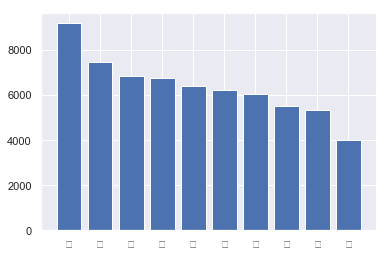

In [9]:
import collections
import matplotlib.pyplot as plt

with open(datapath,'r') as f:
    l = []
    for line in f:
        elms = line.split()
        l.append(elms[0])
    
    c = collections.Counter(l)
    c.pop("EOS")
    
xy = c.most_common(10)
plt.bar(range(10), list(map(lambda t: t[1], xy)), tick_label=list(map(lambda t: t[0], xy)))
plt.show()

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

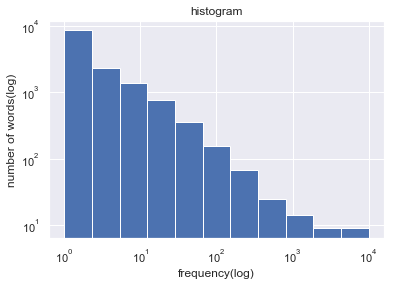

In [10]:
import collections
import numpy as np
import matplotlib.pyplot as plt

with open(datapath,'r') as f:
    l = []
    for line in f:
        elms = line.split()
        l.append(elms[0])
    
    c = collections.Counter(l)
    c.pop("EOS")
    
counts = c.values()
plt.hist(counts, bins = np.logspace(0,4,12))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.title("histogram")
plt.xlabel("frequency(log)")
plt.ylabel("number of words(log)")
plt.show()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

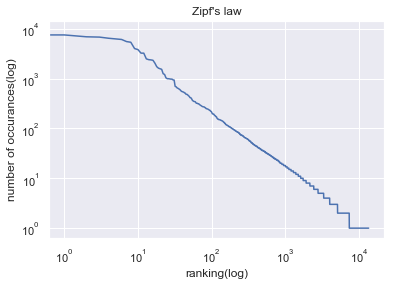

In [11]:
import collections
import numpy as np
import matplotlib.pyplot as plt

with open(datapath,'r') as f:
    l = []
    for line in f:
        elms = line.split()
        l.append(elms[0])
    
    c = collections.Counter(l)
    c.pop("EOS")
    
counts = c.values()
print()
plt.plot(range(len(counts)), sorted(counts)[::-1])
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.title("Zipf's law")
plt.xlabel("ranking(log)")
plt.ylabel("number of occurances(log)")
plt.show()